In [1]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def generate_train_test_datasets(ticker, train_test_split):
    """Get Yahoo! Finance Data for Train/Test Splits."""

    yf_ticker = yf.Ticker(ticker=f'{ticker}.SA')

    df = yf_ticker.history(period='1y', interval='1h')
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df["Volume"] = df["Volume"].fillna(0).astype(int)
    df.ta.log_return(append=True, length=16)
    df.ta.rsi(append=True, length=14)
    df.ta.macd(append=True, fast=12, slow=26)
    df.dropna(inplace=True)

    next_day = datetime.strptime(train_test_split, '%Y-%m-%d')
    next_day = next_day + timedelta(days=1)
    next_day = next_day.strftime('%Y-%m-%d')

    df_training = df.loc[:train_test_split].copy()
    df_evaluation = df.loc[next_day:].copy()

    df_training.dropna().to_csv('training.csv', index=True)
    df_evaluation.dropna().to_csv('evaluation.csv', index=True)

    return df_training, df_evaluation

In [3]:
ticker = 'ABEV3'
train_test_split = '2021-08-31'
df_train, df_test = generate_train_test_datasets(ticker, train_test_split)

In [4]:
df_test.tail()

,Open,High,Low,Close,Volume,LOGRET_16,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2022-04-20 11:00:00-03:00,14.80,14.91,14.75,14.86,2320500,0.019022,57.922271,-0.022212,0.036669,-0.058881
2022-04-20 12:00:00-03:00,14.87,14.91,14.80,14.88,1943700,0.010811,58.923635,-0.006547,0.041867,-0.048415
2022-04-20 13:00:00-03:00,14.88,14.98,14.84,14.92,2333400,0.012138,60.926390,0.008991,0.045925,-0.036933
2022-04-20 14:00:00-03:00,14.93,15.02,14.90,15.00,1233300,0.022246,64.639740,0.027445,0.051503,-0.024058
2022-04-20 14:28:01-03:00,14.99,14.99,14.99,14.99,0,0.022943,63.823222,0.040792,0.051880,-0.011088


In [5]:
df_train.head()

,Open,High,Low,Close,Volume,LOGRET_16,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2021-04-28 12:00:00-03:00,15.23,15.26,15.18,15.23,1557400,-0.029756,28.368412,-0.172416,-0.005759,-0.166657
2021-04-28 13:00:00-03:00,15.24,15.31,15.22,15.31,970800,-0.026428,36.616768,-0.163410,0.002597,-0.166008
2021-04-28 14:00:00-03:00,15.31,15.34,15.27,15.30,1355400,-0.021979,36.057832,-0.155290,0.008574,-0.163864
2021-04-28 15:00:00-03:00,15.30,15.34,15.23,15.26,1492100,-0.023957,33.833193,-0.150350,0.010812,-0.161161
2021-04-28 16:00:00-03:00,15.26,15.28,15.21,15.25,1617900,-0.020766,33.280373,-0.145563,0.012479,-0.158042


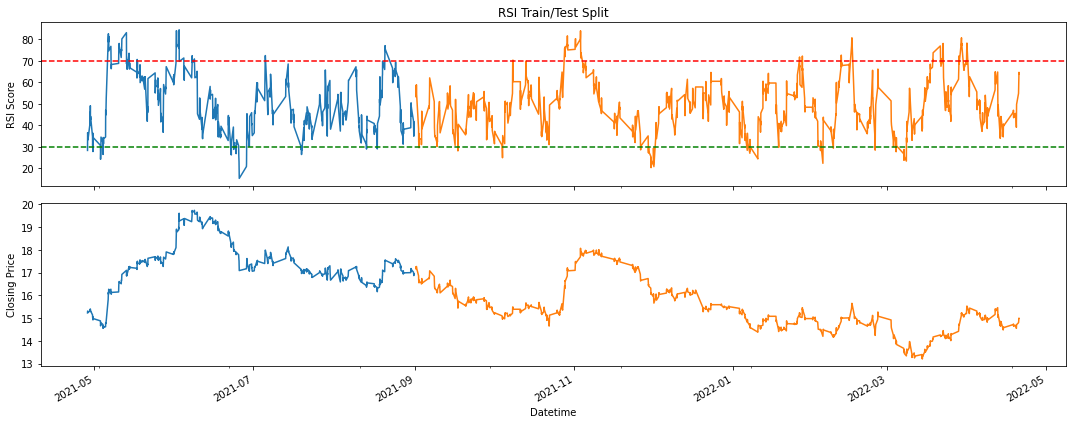

In [19]:
fig, ax = plt.subplots(2, figsize=(15,6), sharex=True)

df_train.RSI_14.plot(ax=ax[0])
df_test.RSI_14.plot(ax=ax[0])
ax[0].set_title('RSI Train/Test Split')

ax[0].set_ylabel('RSI Score')
ax[0].axhline(70, color='red', linestyle="dashed")
ax[0].axhline(30, color='green', linestyle="dashed")

df_train.Close.plot(ax=ax[1])
df_test.Close.plot(ax=ax[1])
ax[1].set_ylabel('Closing Price')
ax[1].set_xlabel('Datetime')

plt.tight_layout();